In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
device = torch.device('cuda') if (torch.cuda.is_available()) else torch.device('cpu')
device

device(type='cpu')

In [57]:
complete = pd.read_csv('EOF_Bath_SPacific.csv')
complete

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev_ts3,prev_ts4,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx,bath1,bath2
0,0,2.0,2902573.0,1.0,2013.0,10.0,10.0,-27.777,-109.312,-27.722,...,-0.307569,1.169331,0.678437,0.630896,-0.723380,0.416301,-0.046,0.265,-1.200968,1.000000
1,1,2.0,2902573.0,2.0,2013.0,10.0,20.0,-27.722,-109.147,-27.461,...,-0.870774,1.611743,0.820251,0.886818,-0.810814,0.542596,0.055,0.165,-1.321344,1.000000
2,2,2.0,2902573.0,3.0,2013.0,10.0,30.0,-27.461,-108.919,-27.396,...,-0.616752,1.379309,0.782344,0.769953,-0.841099,0.628301,0.261,0.228,-1.407630,1.000000
3,3,2.0,2902573.0,4.0,2013.0,11.0,9.0,-27.396,-108.747,-27.184,...,-0.214488,0.994610,0.597145,0.429359,-0.646446,0.456008,0.065,0.172,-4.019325,1.000000
4,4,2.0,2902573.0,5.0,2013.0,11.0,19.0,-27.184,-108.779,-27.197,...,-0.293214,1.177932,0.583710,0.624795,-0.630760,0.529487,0.212,-0.032,2.578582,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58731,59191,10.0,5900395.0,10.0,2004.0,1.0,6.0,-31.987,-130.156,-31.823,...,-0.073771,-1.082395,-0.362481,0.624399,-0.222743,0.426153,0.094,0.193,0.593204,1.000000
58732,59192,10.0,5900395.0,11.0,2004.0,1.0,16.0,-31.823,-130.239,-31.943,...,-0.175300,-0.780688,-0.340543,0.737954,-0.338791,0.602678,0.164,-0.083,0.938206,1.000000
58733,59193,10.0,5900395.0,12.0,2004.0,1.0,26.0,-31.943,-130.363,-32.069,...,0.259674,-1.321892,-0.436276,0.516380,-0.260359,0.592548,-0.120,-0.124,0.398766,1.000000
58734,59194,10.0,5900395.0,13.0,2004.0,2.0,5.0,-32.069,-130.205,-31.994,...,0.092383,-1.170868,-0.446612,0.569944,-0.247247,0.543559,-0.126,0.158,1.000000,-3.622534


In [58]:
scales = [max(i) for i in np.abs(complete[['bath1', 'bath2']].to_numpy())]
complete = complete.assign(bath1 = complete.get('bath1') / scales).assign(bath2 = complete.get('bath2') / scales)
complete

,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,nlat,...,prev_ts3,prev_ts4,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx,bath1,bath2
0,0,2.0,2902573.0,1.0,2013.0,10.0,10.0,-27.777,-109.312,-27.722,...,-0.307569,1.169331,0.678437,0.630896,-0.723380,0.416301,-0.046,0.265,-1.000000,0.832662
1,1,2.0,2902573.0,2.0,2013.0,10.0,20.0,-27.722,-109.147,-27.461,...,-0.870774,1.611743,0.820251,0.886818,-0.810814,0.542596,0.055,0.165,-1.000000,0.756805
2,2,2.0,2902573.0,3.0,2013.0,10.0,30.0,-27.461,-108.919,-27.396,...,-0.616752,1.379309,0.782344,0.769953,-0.841099,0.628301,0.261,0.228,-1.000000,0.710414
3,3,2.0,2902573.0,4.0,2013.0,11.0,9.0,-27.396,-108.747,-27.184,...,-0.214488,0.994610,0.597145,0.429359,-0.646446,0.456008,0.065,0.172,-1.000000,0.248798
4,4,2.0,2902573.0,5.0,2013.0,11.0,19.0,-27.184,-108.779,-27.197,...,-0.293214,1.177932,0.583710,0.624795,-0.630760,0.529487,0.212,-0.032,1.000000,0.387810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58731,59191,10.0,5900395.0,10.0,2004.0,1.0,6.0,-31.987,-130.156,-31.823,...,-0.073771,-1.082395,-0.362481,0.624399,-0.222743,0.426153,0.094,0.193,0.593204,1.000000
58732,59192,10.0,5900395.0,11.0,2004.0,1.0,16.0,-31.823,-130.239,-31.943,...,-0.175300,-0.780688,-0.340543,0.737954,-0.338791,0.602678,0.164,-0.083,0.938206,1.000000
58733,59193,10.0,5900395.0,12.0,2004.0,1.0,26.0,-31.943,-130.363,-32.069,...,0.259674,-1.321892,-0.436276,0.516380,-0.260359,0.592548,-0.120,-0.124,0.398766,1.000000
58734,59194,10.0,5900395.0,13.0,2004.0,2.0,5.0,-32.069,-130.205,-31.994,...,0.092383,-1.170868,-0.446612,0.569944,-0.247247,0.543559,-0.126,0.158,0.276050,-1.000000


In [59]:
data = complete
# find correlation between prev_dx and dx
prev_dx = data.get('prev_dx')
dx = data.get('dx')
prev_dy = data.get('prev_dy')
dy = data.get('dy')
dx.corr(prev_dx), dy.corr(prev_dy)

(0.7108622247762247, 0.6707857534394924)

In [120]:
# chosen_params = ['bath1', 'bath2', 'prev_dy', 'prev_dx', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8',
#   'prev_ts1', 'prev_ts2', 'prev_ts3', 'prev_ts4', 'prev_ts5', 'prev_ts6',
#   'prev_ts7', 'prev_ts8', 'prev_dy', 'prev_dx', 'bath1', 'bath2', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'prev_dy', 'prev_dx', 'dy', 'dx']
chosen_params = ['prev_dy', 'prev_dx', 'dy', 'dx']
# chosen_params = ['ts1', 'ts2', 'ts3', 'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'bath1', 'bath2', 'prev_dy', 'prev_dx', 'dy', 'dx']

final = data[chosen_params].dropna()
final

,prev_dy,prev_dx,dy,dx
0,-0.046,0.265,0.055,0.165
1,0.055,0.165,0.261,0.228
2,0.261,0.228,0.065,0.172
3,0.065,0.172,0.212,-0.032
4,0.212,-0.032,-0.013,-0.023
...,...,...,...,...
58731,0.094,0.193,0.164,-0.083
58732,0.164,-0.083,-0.120,-0.124
58733,-0.120,-0.124,-0.126,0.158
58734,-0.126,0.158,0.075,0.262


In [121]:
Y = final[['dy', 'dx']].to_numpy()
X = final.drop(columns=['dy', 'dx']).to_numpy()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
r_squared = r2_score(Y, Y_pred)
R = np.sqrt(r_squared)

print("Coefficient of Multiple Correlation (R):", R)

X = torch.tensor(X).float().to(device)
Y = torch.tensor(Y).float().to(device)

# its 0.13 when not including prev profile
print('correlation btwn pred_dy and dy:', np.sqrt(r2_score(Y[:, 0], Y_pred[:, 0])))
print('correlation btwn pred_dx and dx:', np.sqrt(r2_score(Y[:, 1], Y_pred[:, 1])))
np.mean((Y_pred - final[['dy', 'dx']].to_numpy())**2)

Coefficient of Multiple Correlation (R): 0.6916528607537348
correlation btwn pred_dy and dy: 0.6714873959622254
correlation btwn pred_dx and dx: 0.7112468172874274


0.018885507170128168

In [122]:
model.coef_

array([[ 0.66835691,  0.02413804],
       [-0.02964764,  0.71141811]])

In [123]:
# TODO: instead of doing a naive shuffle, keep profiles specific to floats (or regions) grouped together
X, Y = shuffle(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [126]:
model = nn.Sequential(
    nn.Linear(X.size()[1], 32),
    nn.LeakyReLU(),
    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.Linear(16, 2)
).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=.1)
criterion = nn.MSELoss()

# todo: try different batch sizes
losses = []
for epoch in range(10):
  optimizer.zero_grad()
  for i in range(len(X_train)):
    x = X_train[i]
    y = Y_train[i]
    guess = model(x)
    loss = criterion(guess, y)
    loss.backward()
    optimizer.step()

  losses.append(loss.cpu().detach().numpy())

print("training loss:", np.sqrt(losses[-1]))
print("test loss:", criterion(model(X_test), Y_test).cpu().detach().numpy())
plt.scatter(np.arange(len(losses)), losses)

KeyboardInterrupt: 

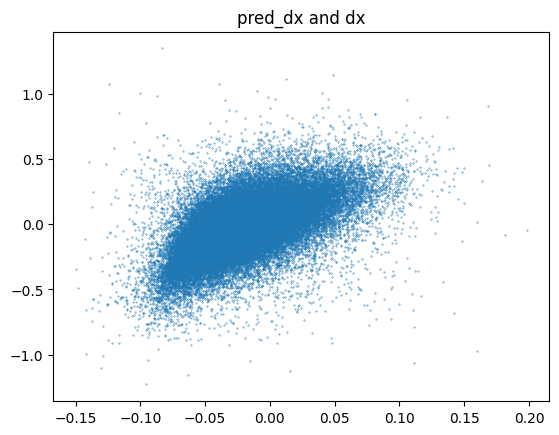

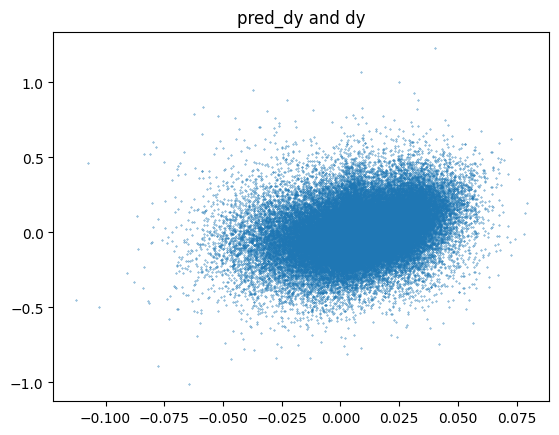

In [117]:
Y_pred = model(X)

plt.scatter(Y_pred.detach().numpy()[:, 1], Y.detach().numpy()[:, 1], s=.1)
plt.title('pred_dx and dx')
plt.show()

plt.scatter(Y_pred.detach().numpy()[:, 0], Y.detach().numpy()[:, 0], s=0.1)
plt.title('pred_dy and dy')
plt.show()

In [118]:
# picking a contiguous sequence
just_one = data[data.get('float') == 2902573.0].head(6)

small_test = torch.tensor(just_one[chosen_params[:-2]].to_numpy()).float().to(device)
pred = model(small_test).detach().numpy()
# pred = model.predict(small_test)
just_one = just_one.assign(pnlat = pred[:, 0] + just_one.get('lat'))
just_one = just_one.assign(pnlon = pred[:, 1] + just_one.get('lon')).reset_index()
just_one

,index,Unnamed: 0,folderidx,float,profileidx,year,month,day,lat,lon,...,prev_ts5,prev_ts6,prev_ts7,prev_ts8,prev_dy,prev_dx,bath1,bath2,pnlat,pnlon
0,0,0,2.0,2902573.0,1.0,2013.0,10.0,10.0,-27.777,-109.312,...,0.678437,0.630896,-0.723380,0.416301,-0.046,0.265,-1.0,0.832662,-27.787688,-109.249365
1,1,1,2.0,2902573.0,2.0,2013.0,10.0,20.0,-27.722,-109.147,...,0.820251,0.886818,-0.810814,0.542596,0.055,0.165,-1.0,0.756805,-27.721871,-109.119909
2,2,2,2.0,2902573.0,3.0,2013.0,10.0,30.0,-27.461,-108.919,...,0.782344,0.769953,-0.841099,0.628301,0.261,0.228,-1.0,0.710414,-27.454595,-108.908677
3,3,3,2.0,2902573.0,4.0,2013.0,11.0,9.0,-27.396,-108.747,...,0.597145,0.429359,-0.646446,0.456008,0.065,0.172,-1.0,0.248798,-27.387579,-108.761915
4,4,4,2.0,2902573.0,5.0,2013.0,11.0,19.0,-27.184,-108.779,...,0.583710,0.624795,-0.630760,0.529487,0.212,-0.032,1.0,0.387810,-27.160273,-108.826729
5,5,5,2.0,2902573.0,6.0,2013.0,11.0,29.0,-27.197,-108.802,...,0.459951,0.486530,-0.550061,0.476311,-0.013,-0.023,1.0,0.292860,-27.186636,-108.853079


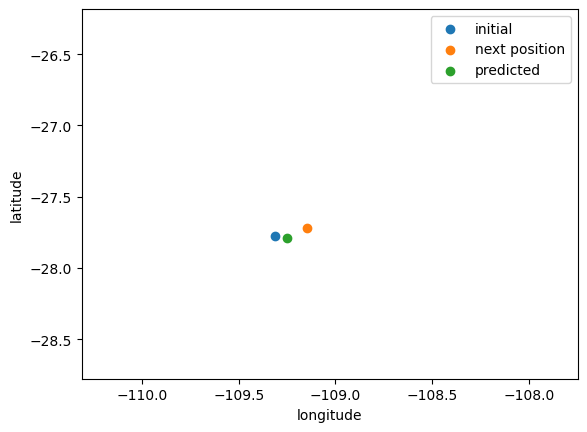

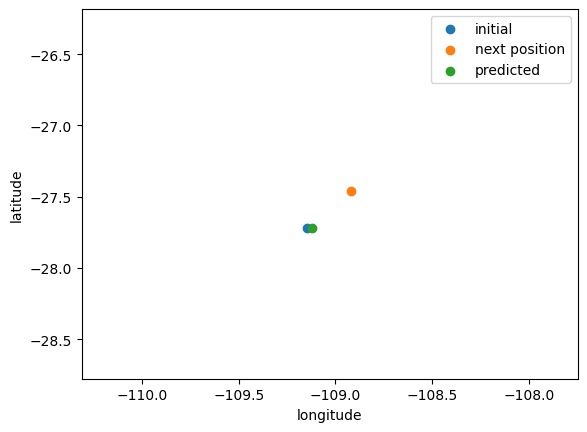

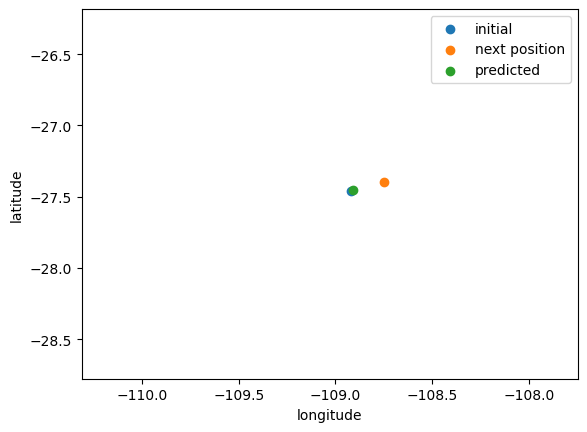

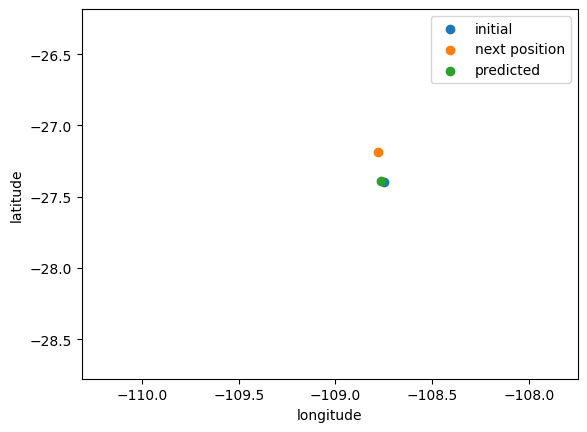

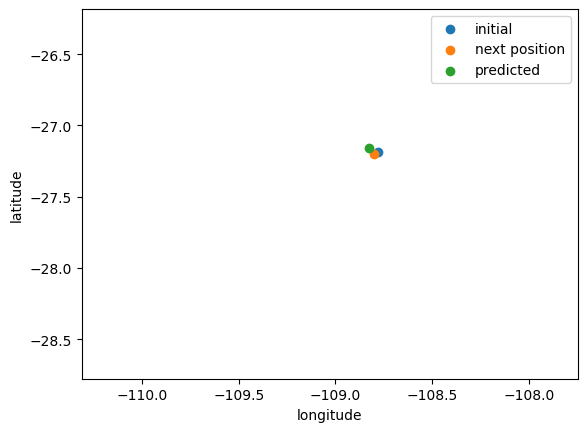

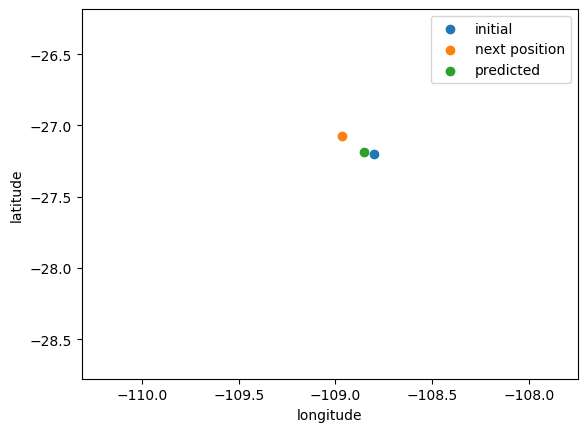

In [119]:
for i in range(just_one.shape[0]):
  y_plot = [just_one.get('lat')[i], just_one.get('nlat')[i], just_one.get('pnlat')[i]]
  x_plot = [just_one.get('lon')[i], just_one.get('nlon')[i], just_one.get('pnlon')[i]]
  for j in range(3):
    plt.scatter(x_plot[j], y_plot[j])
  plt.legend(['initial', 'next position', 'predicted'])
  plt.xlim((just_one.get('lon').min()-1, just_one.get('lon').max()+1))
  plt.ylim((just_one.get('lat').min()-1, just_one.get('lat').max()+1))
  plt.xlabel('longitude')
  plt.ylabel('latitude')
  plt.show()